# Convolutional Neural Network (CNN)

CNN is a deep learning model specifically designed for processing grid-like data, especially images.

**Key Concept**

Images are made up of pixels, which can be represented as matrices (2D for grayscale, 3D for RGB). CNNs are excellent at detecting spatial hierarchies in images (like edges → shapes → objects).

### Why CNN?

Traditional machine learning models like Logistic Regression or even Feedforward Neural Networks fail with image data because:

- They don’t capture spatial relationships.

- They have too many parameters if the image is high resolution.

- Feature engineering (edges, textures) has to be manually done.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\DELL 4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL 4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 618ms/step - accuracy: 0.5319 - loss: 1.1623 - val_accuracy: 0.6250 - val_loss: 0.6834
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 551ms/step - accuracy: 0.6135 - loss: 0.6762 - val_accuracy: 0.5500 - val_loss: 0.6890
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 523ms/step - accuracy: 0.4847 - loss: 0.6970 - val_accuracy: 0.3250 - val_loss: 0.7241
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 530ms/step - accuracy: 0.7170 - loss: 0.6626 - val_accuracy: 0.4500 - val_loss: 0.7257
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 0.4906 - loss: 0.6868 - val_accuracy: 0.4250 - val_loss: 0.6941


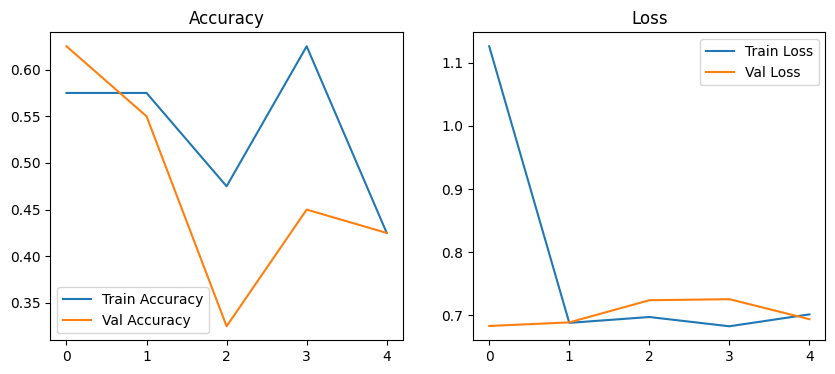

In [4]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Set your local path
base_dir = r"C:\Users\DELL 4\Desktop\cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# ✅ Constants
IMG_SIZE = (150, 150)
BATCH_SIZE = 8

# ✅ Image generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# ✅ Simple CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary: Cat or Dog
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ✅ Train the model (just 5 steps/epoch to limit to ~40 images)
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=5,
    validation_data=val_generator,
    validation_steps=5
)

# ✅ Plot Accuracy & Loss
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()
